In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/database security')
print(os.getcwd())

/content/drive/My Drive/database security


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import  Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.metrics import Recall

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Loding dataset

In [ ]:
df= pd.read_csv("myDataset.csv", encoding='utf-16')
df.head()

,sentence,type
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18900 entries, 0 to 18899
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  18880 non-null  object
 1   type      18900 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 295.4+ KB


In [ ]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of malicious and benign queries')

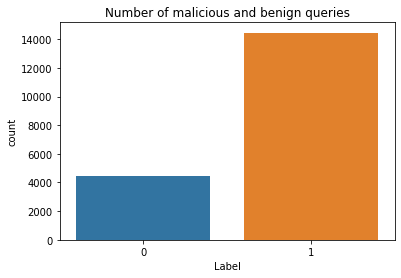

In [ ]:
sns.countplot(df.type)
plt.xlabel('Label')
plt.title('Number of malicious and benign queries')

In [ ]:
X=df['sentence']
y=df['type']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.head)
print(y_test.head)

<bound method NDFrame.head of 13002    "  )  )   UNION ALL SELECT NULL, NULL, NULL, N...
4417     " )  UNION ALL SELECT NULL, NULL, NULL, NULL, ...
14661     When transition-based parsing consumes stream...
6920     '  )  )   )  UNION ALL SELECT NULL, NULL, NULL...
15607     House fire Helmbrechts: Rescue services retri...
                               ...                        
11288    '  )  )   UNION ALL SELECT NULL, NULL, NULL, N...
11968      )  )   UNION ALL SELECT NULL, NULL, NULL, NU...
5394     "  )  )   )  UNION ALL SELECT NULL, NULL, NULL...
860       RLIKE  ( SELECT  ( CASE WHEN  ( 4346 = 4347 )...
15803     The report also includes list typical symptom...
Name: sentence, Length: 15104, dtype: object>
<bound method NDFrame.head of 344      1
11887    1
18012    0
7562     1
9351     1
        ..
10358    1
3073     1
8500     1
1446     1
953      1
Name: type, Length: 3776, dtype: int64>


# Training Data Preprocessing

In [ ]:
max_words = 1000
max_len = 317
tok = Tokenizer(num_words=max_words)
print(type(tok))
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)


<class 'keras_preprocessing.text.Tokenizer'>


#Test data preprocessing

In [ ]:
X_test_sequences = tok.texts_to_sequences(X_test)
X_test_sequences_matrix = sequence.pad_sequences(X_test_sequences,maxlen=max_len)

#MLP model

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(200,input_shape = (317,), activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               63600     
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_15 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_16 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 201       
Total params: 224,601
Trainable params: 224,601
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])



In [ ]:
history=model.fit(sequences_matrix,y_train,batch_size=128,epochs=30, validation_split=0.2)

Epoch 1/30
95/95 [==============================] - 2s 13ms/step - loss: 1.3313 - accuracy: 0.7507 - val_loss: 0.2648 - val_accuracy: 0.9153
Epoch 2/30
95/95 [==============================] - 1s 12ms/step - loss: 0.2394 - accuracy: 0.9327 - val_loss: 0.1605 - val_accuracy: 0.9424
Epoch 3/30
95/95 [==============================] - 1s 11ms/step - loss: 0.1378 - accuracy: 0.9525 - val_loss: 0.1355 - val_accuracy: 0.9480
Epoch 4/30
95/95 [==============================] - 1s 11ms/step - loss: 0.1170 - accuracy: 0.9627 - val_loss: 0.1083 - val_accuracy: 0.9715
Epoch 5/30
95/95 [==============================] - 1s 11ms/step - loss: 0.0970 - accuracy: 0.9714 - val_loss: 0.0871 - val_accuracy: 0.9669
Epoch 6/30
95/95 [==============================] - 1s 11ms/step - loss: 0.0924 - accuracy: 0.9671 - val_loss: 0.2108 - val_accuracy: 0.9752
Epoch 7/30
95/95 [==============================] - 1s 12ms/step - loss: 0.1182 - accuracy: 0.9720 - val_loss: 0.0933 - val_accuracy: 0.9702
Epoch 8/30
95

#Evaluation

In [ ]:
Accuracy = model.evaluate(X_test_sequences_matrix,y_test)

118/118 [==============================] - 0s 2ms/step - loss: 1.1439 - accuracy: 0.9793


In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

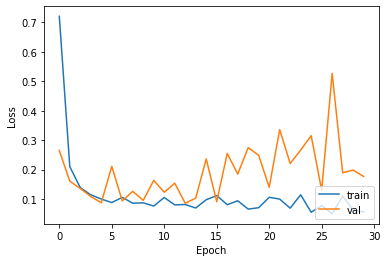

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

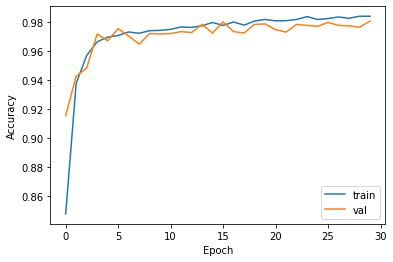

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train','val'],loc=4)

In [ ]:
print(X_test_sequences_matrix.shape)

(3776, 317)


In [ ]:
y_pred=model.predict(X_test_sequences_matrix)

In [ ]:
print(y_pred)

[[9.9379188e-01]
 [1.0000000e+00]
 [2.3553483e-32]
 ...
 [9.9010587e-01]
 [9.9405485e-01]
 [9.9589831e-01]]


In [ ]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    elif y_pred[i]<=0.5:
        y_pred[i]=0

In [ ]:
print(y_pred)

[[1.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
confusion_matrix(y_test, y_pred)
# plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred, zero_division=1)
recall= recall_score(y_test, y_pred, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Accuracy : 0.979343220338983 
 Precision : 0.9879310344827587 
 Recall : 0.9852132049518569


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix : \n" ,cm)

confusion matrix : 
 [[ 833   35]
 [  43 2865]]


# saving the model

In [ ]:
from keras.models import load_model
from pathlib import Path


# Save neural network's trained weights
model.save_weights("MLP_weights.h5")
print('done')

# or you can save the full model via:
model.save('MLP_model.h5')

done


In [ ]:
#loading the model and the weights:
loaded_model = tf.keras.models.load_model('MLP_model.h5')
loaded_model.load_weights('MLP_weights.h5')  # to load